# Text Analysis of Twitter data

A fun project that I did during the weekend. The purpose of this project is to take out the sentiments from the twitter texts. <br/>
Here is a summary of the following project:

## Example Workflow:

### 1. Data Cleaning:

Input: "@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâ s why" <br /> 
Step 1: "user white supremacists want everyone to see the new â birdsâ movie â and here's why" <br/>
Step 2: "white supremacist want everyone see birdsâ movie hereâs"

### 2. Sentiment Analysis:

Input: "user white supremacists want everyone to see the new â birdsâ movie â and here's why" <br /> 
Output: "partially negative"


### Loading the Data
I load the Twitter data from a CSV file. This data contains tweets that will be analyzed.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv('test-2.csv')

data.head(2)

/Users/arya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...


### Count the words:

Next, I count the number of words in each tweet. This helps us understand the length of the tweets and prepare for further text processing.

In [3]:
def num_of_words(df):
    df['word_count'] = df['tweet'].apply(lambda x : len(str(x).split(" ")))
    print(df[['tweet','word_count']].head(1))
    
num_of_words(data)

                                               tweet  word_count
0  #studiolife #aislife #requires #passion #dedic...          12


### Count the characters

In [4]:
def num_of_chars(df):
    df['char_count'] = df['tweet'].str.len()
    print(df[['tweet', 'char_count']].head())
    
num_of_chars(data)

                                               tweet  char_count
0  #studiolife #aislife #requires #passion #dedic...          90
1   @user #white #supremacists want everyone to s...         101
2  safe ways to heal your #acne!!    #altwaystohe...          71
3  is the hp and the cursed child book up for res...         142
4    3rd #bihday to my amazing, hilarious #nephew...          93


### Count the numbers

In [5]:
def num_numeric(df):
    df['numeric'] = df['tweet'].apply(lambda x: len([x for x in
                                                    x.split() if x.isdigit()]))
    
num_numeric(data)    

# Text analysis

**CounterVectorization** is a SciKitLearn library that transforms any text document by converting each unique word into a feature and counting its occurrences. This process can produce numerous features, but it includes useful parameters like stop_words, n_grams, and max_features to manage them. 

**Stop_words** exclude common, insignificant words such as "is," "the," and "a," which often appear but have minimal impact. 

The **ngrams_range** parameter allows for grouping words together, producing phrases like "Hello again" (for n=2) or "See you later" (for n=3) instead of individual words. 

The **max_features** parameter controls the number of features created, with "none" including all words, and setting it to a specific number, like 50, limiting the features to the top 50 most frequent words.

difference between **HashingVectorizer** and **counterVectorizer**

The **HashingVectorizer** is a tool that helps convert text into numbers so that a computer can work with the text more easily. Here's how it works and why it's useful:

Turning Words into Numbers:

Imagine you have a bunch of text documents and you want to analyze them. Computers can't understand words directly, so we need to convert these words into numbers.
HashingVectorizer helps do this by using a special trick called "hashing."
Hashing Trick:

Instead of keeping a list of all the unique words (like a dictionary), HashingVectorizer uses a mathematical function to turn each word into a number.
This is like having a magic box where you put in a word, and it gives you a number. The same word will always give you the same number.
Fixed Number of Features:

When converting words to numbers, **HashingVectorizer** decides in advance how many different numbers (features) it will use. This is like saying, "I will use up to 1,000 different numbers to represent all my words."
This helps keep the amount of data manageable, especially if you have a lot of text.
Efficient and Memory-Friendly:

Because it doesn't need to store the actual list of words, HashingVectorizer uses less memory. It's like packing for a trip and deciding to bring only what you absolutely need, so your suitcase stays light.
This makes it especially good for working with large amounts of text.

**One-Way Conversion:**

Once the text is turned into numbers, you can't easily go back to the original words. It's like turning eggs into an omelette—you can't get back to the original eggs.
Collisions:

Sometimes, different words might get turned into the same number by the hashing process. This is called a "collision." It's like two different keys fitting into the same lock. However, this doesn't usually cause big problems if you use enough different numbers.


**CountVectorizer**
Vocabulary Building:

How it works: It reads all the text documents and builds a dictionary (vocabulary) of all unique words. Each word is then assigned a unique index.

Memory Usage: It stores the entire vocabulary in memory, which can be a lot if there are many unique words.

Matrix: It creates a matrix where each row represents a document and each column represents a word from the vocabulary. The values in the matrix indicate how often each word appears in each document.
Inverse Transformation:

Reverse Process: You can convert the numerical matrix back to the original words because the vocabulary is stored.

Example Use: Great for smaller datasets where storing the vocabulary is not an issue.

### Examples of 'CountVectorizer' and 'HashingVectorizer':

In [6]:
#extracts all the unique "features"(words) from the document/text
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
         ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [7]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [10]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2,2))
# to remove stop words use 'stop_words ='english'
x2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names_out())
print(x2.toarray())

['and this' 'document is' 'first document' 'is the' 'is this'
 'second document' 'the first' 'the second' 'the third' 'third one'
 'this document' 'this is' 'this the']
[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


In [11]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
         ]
vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)

**note:** The HashingVectorizer in SciKitLearn does not support the get_feature_names_out 
method because it uses a hashing trick to convert text data into numerical features, 
and thus it does not keep track of the original feature names. Hence, we cannot see the output like we saw in 'CountVectorizer'.

In [12]:
print(X.shape)

(4, 16)


### Lowercasing

Converting all the text into lowercase so that there will be no duplicate texts

In [14]:
def lower_case(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x 
                                                      in x.split()))
    print(df['tweet'].head())
    
lower_case(data)

0    #studiolife #aislife #requires #passion #dedic...
1    @user #white #supremacists want everyone to se...
2    safe ways to heal your #acne!! #altwaystoheal ...
3    is the hp and the cursed child book up for res...
4    3rd #bihday to my amazing, hilarious #nephew e...
Name: tweet, dtype: object


### Removing the punctuation

In [15]:
def punct_remove(df):
    df['tweet'] = df['tweet'].str.replace('[^\w\s]','', regex=True)
    print(df['tweet'].iloc[1])

punct_remove(data)

user white supremacists want everyone to see the new â birdsâ movie â and hereâs why


### Stopwords removal

Stop words generates a list of words that will not be included as a feature. The primary use of this is the “English” dictionary where it will get rid of insignificant words like “is, the, a, it, as “which can appear quite frequently, but have little to no influence on our end goal.

In [16]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

stop = stopwords.words('english')

def stop_words(df):
    df['stopwords']= df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
    print(df[['tweet', 'stopwords']].head())
    
stop_words(data)

                                               tweet  stopwords
0  studiolife aislife requires passion dedication...          1
1  user white supremacists want everyone to see t...          4
2  safe ways to heal your acne altwaystoheal heal...          2
3  is the hp and the cursed child book up for res...         11
4  3rd bihday to my amazing hilarious nephew eli ...          4


In [17]:
def stopwords_remove(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for
                                                      x in x.split() if x not in stop))
    print(df['tweet'].head())
    
stopwords_remove(data)

0    studiolife aislife requires passion dedication...
1    user white supremacists want everyone see new ...
2    safe ways heal acne altwaystoheal healthy healing
3    hp cursed child book reservations already yes ...
4    3rd bihday amazing hilarious nephew eli ahmir ...
Name: tweet, dtype: object


### Frequent word removal

In [27]:
freq = pd.Series(' '.join(data['tweet']).split()).value_counts()[:10]
freq
freq = list(freq.index)

In [29]:
def freq_word(df):
    df['frequent_words'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split()
                                                      if x in freq))
    result_df = df[df['frequent_words'] != ""]
    print(result_df[['tweet', 'frequent_words']].head())
    
freq_word(data)

                                                tweet  frequent_words
1   white supremacists want everyone see new birds...             new
4   3rd bihday amazing hilarious nephew eli ahmir ...          bihday
13  good food good life enjoy ðððððð called garlic...  good good life
16           got limited edition rain shine set today           today
21  levyrroni recuerdos memoriesðâððð recuerdos fr...            life


In [30]:
def freq_word_removal(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split()
                                                      if x not in freq))
    print(df['tweet'].head())
    
freq_word_removal(data)

0    studiolife aislife requires passion dedication...
1    white supremacists want everyone see birdsâ mo...
2    safe ways heal acne altwaystoheal healthy healing
3    hp cursed child book reservations already yes ...
4    3rd amazing hilarious nephew eli ahmir uncle d...
Name: tweet, dtype: object


### Rare word removal

In [37]:
freq = pd.Series(' '.join(data['tweet']).split()).value_counts()[-10:]
freq
freq = list(freq.index)

In [38]:
def rare_word(df):
    df['only_rarewords'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split()
                                                               if x in freq))
    result_df = df[df['only_rarewords'] != ""]
    print(result_df[['tweet', 'only_rarewords']].head(5))
    
rare_word(data)

                                                   tweet  \
6011   overwatch missed livecleo overwatch pc pcgame ...   
6012   manutd fans full force defending ronaldo tonig...   
6013   pumped show wolfden couldnt believe saw mornin...   
6017   falling stairs list morning spoonie ouch bruis...   
17196  song glad free download shoegaze newmusic newsong   

                                 only_rarewords  
6011                                     pcgame  
6012                                 manutd cr7  
6013                         wolfden airforfree  
6017   spoonie bruised wastedenergy chronicpain  
17196                                  shoegaze  


In [39]:
def rare_word_removal(df):
    df['removal'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    print(df[['id','tweet']].head())
    
rare_word_removal(data)

      id                                              tweet
0  31963  studiolife aislife requires passion dedication...
1  31964  white supremacists want everyone see birdsâ mo...
2  31965  safe ways heal acne altwaystoheal healthy healing
3  31966  hp cursed child book reservations already yes ...
4  31967  3rd amazing hilarious nephew eli ahmir uncle d...


### Correct spelling 

In [42]:
from textblob import TextBlob

def spell_correction(df):
    return df['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

spell_correction(data)

0    studiolife dislike requires passion education ...
1    white supremacists want everyone see birds mov...
2    safe ways heal acne altwaystoheal healthy healing
3    he cursed child book reservations already yes ...
4    rd amazing hilarious nephew epi their uncle da...
Name: tweet, dtype: object

### Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences.


In [46]:
from textblob import TextBlob
def tokens(df):
    return TextBlob(df['tweet'][1]).words

tokens(data)

WordList(['white', 'supremacists', 'want', 'everyone', 'see', 'birdsâ', 'movie', 'hereâs'])

### Stemming

So, stemming takes a word and refers it back to its base or root form. Stems, Stemming, Stemmed and Stemtization are all based on the single word stem.

In [49]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
def stemming(df):
    return df['tweet'][:5].apply(lambda x: " ".join([st.stem(word)
                                                    for word in x.split()]))

stemming(data)

0    studiolif aislif requir passion dedic willpow ...
1    white supremacist want everyon see birdsâ movi...
2            safe way heal acn altwaystoh healthi heal
3    hp curs child book reserv alreadi ye ððð harry...
4    3rd amaz hilari nephew eli ahmir uncl dave lov...
Name: tweet, dtype: object

### Lemmentization

Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices.

Lemmatization makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [51]:
from textblob import TextBlob
import nltk

# Download the necessary resources
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/arya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/arya/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [63]:
from textblob import Word
def lemmatization(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    print(df['tweet'].head())
    
lemmatization(data)

0    studiolife aislife requires passion dedication...
1    white supremacist want everyone see birdsâ mov...
2     safe way heal acne altwaystoheal healthy healing
3    hp cursed child book reservation already yes ð...
4    3rd amazing hilarious nephew eli ahmir uncle d...
Name: tweet, dtype: object


# Advanced text processing 
Even thought there are functions that can easily use the N-gram along with other features and give an output. However, we will still look at the working of "ngram" here:

### N-gram

N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one.

The ngrams_range parameter determines how words are grouped together. Instead of having the NLP process return individual words, it can return phrases such as "No problem" if set to 2 or "See you later" if set to 3.

In [64]:
from textblob import TextBlob
def combination_of_words(df):
    return (TextBlob (df['tweet'][0]).ngrams(2))
combination_of_words(data)

[WordList(['studiolife', 'aislife']),
 WordList(['aislife', 'requires']),
 WordList(['requires', 'passion']),
 WordList(['passion', 'dedication']),
 WordList(['dedication', 'willpower']),
 WordList(['willpower', 'find']),
 WordList(['find', 'newmaterialsâ'])]

## Term frequency

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

The more the value of IDF, the more unique is the word.

In [54]:
def term_frequency(df):
    tf1 = (df['tweet']).apply(lambda x: pd.value_counts(
        x.split(" "))).sum(axis = 0).reset_index()
    tf1.columns = ['words','tf']
    return tf1.head()

In [ ]:
term_frequency(data).iloc[1]

## Inverse Document Frequency (IDF)

The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF can be calculated as follows -

IDF = log(N/n),

where, N is the total number of rows and n is the number of rows in which the word was present.

Now, we will calculate IDF for the same tweets for which we calculated the term frequency.

## Term Frequency – Inverse Document Frequency (TF-IDF) ¶

TF-IDF is the multiplication of the TF and IDF which we calculated again below for convinience.

In [65]:
tf1 = (data['tweet'][1:2]).apply(lambda x: pd.value_counts(
x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']

/var/folders/sw/wjwplwf51d53rn6bd73ct86w0000gq/T/ipykernel_35365/2183828162.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf1 = (data['tweet'][1:2]).apply(lambda x: pd.value_counts(
/var/folders/sw/wjwplwf51d53rn6bd73ct86w0000gq/T/ipykernel_35365/2183828162.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf1 = (data['tweet'][1:2]).apply(lambda x: pd.value_counts(


In [66]:
for i, word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data
                                                        ['tweet'].str.contains(word)])))

In [67]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,white,1,4.381852,4.381852
1,supremacist,1,8.366196,8.366196
2,want,1,3.693367,3.693367
3,everyone,1,4.622592,4.622592
4,see,1,3.429925,3.429925
5,birdsâ,1,9.752490,9.752490
6,movie,1,5.275153,5.275153
7,hereâs,1,9.059343,9.059343


‘don’t’, ‘can’t’, and ‘use’ are commonly occurring words hence given less scores compared to 'supremacist' or 'hereâs'

the above is the way of demonstrating how we can calculate the tf_idf for the texts. however, We don’t have to calculate TF and IDF every time beforehand and then multiply it to obtain TF-IDF. Instead, sklearn has a separate function to directly obtain it:

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features =1000, lowercase = True, analyzer ='word',
                       stop_words='english', ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['tweet'])

data_vect

<17197x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 57397 stored elements in Compressed Sparse Row format>

## Bag of Words 


**Bag of Words (BoW)** refers to the representation of text which describes the presence of words within the text data. Two similar text fields will contain similar kind of words, and will therefore have a similar bag of words.
It is a method to analyze text by counting the occurrence of each word in a document. Imagine putting all the words from an email into a bag and then counting how many times each word appears. This helps us see which topics are common in the text. By comparing the word counts from different texts, we can understand their content without reading every word.<br/>
For example, if an email has the words "meeting," "schedule," and "tomorrow" appearing multiple times, you can guess that the email might be about scheduling a meeting for tomorrow.

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features =1000, lowercase = True,
                       stop_words='english', ngram_range=(1,1), analyzer = "word")
data_bow = bow.fit_transform(data['tweet'])
data_bow

<17197x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 57397 stored elements in Compressed Sparse Row format>

## Sentiment Analysis

In [70]:
def polarity_subjectivity(df):
    return df['tweet'].apply(lambda x: TextBlob(x).sentiment)
polarity_subjectivity(data)

0                                      (0.0, 0.0)
1                                      (0.0, 0.0)
2                                      (0.5, 0.5)
3                                      (0.5, 1.0)
4                                    (0.4, 0.625)
                           ...                   
17192                                  (0.0, 0.0)
17193                                  (0.0, 0.0)
17194                                  (0.0, 0.0)
17195    (0.2857142857142857, 0.5357142857142857)
17196                                 (0.45, 0.9)
Name: tweet, Length: 17197, dtype: object

We can can see that it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment.

In [71]:
def sentiment_analysis(df):
    df['sentiment'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment[0])
    return df[['id', 'tweet','sentiment']].head()
sentiment_analysis(data)

,id,tweet,sentiment
0,31963,studiolife aislife requires passion dedication...,0.0
1,31964,white supremacist want everyone see birdsâ mov...,0.0
2,31965,safe way heal acne altwaystoheal healthy healing,0.5
3,31966,hp cursed child book reservation already yes ð...,0.5
4,31967,3rd amazing hilarious nephew eli ahmir uncle d...,0.4


In [72]:
# Function to categorize sentiment scores
def categorize_sentiment(df):
    conditions = [
        (df['sentiment'] > 0.5),
        (df['sentiment'] > 0) & (df['sentiment'] <= 0.5),
        (df['sentiment'] < 0) & (df['sentiment'] >= -0.5),
        (df['sentiment'] < -0.5)
    ]
    categories = ['positive', 'partially positive', 'partially negative', 'negative']
    df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-float('inf'), -0.5, 0, 0.5, float('inf')], labels=categories)
    return df[['id', 'tweet', 'sentiment', 'sentiment_category']]

# Apply categorization
categorize_sentiment(data)

,id,tweet,sentiment,sentiment_category
0,31963,studiolife aislife requires passion dedication...,0.000000,partially positive
1,31964,white supremacist want everyone see birdsâ mov...,0.000000,partially positive
2,31965,safe way heal acne altwaystoheal healthy healing,0.500000,partially negative
3,31966,hp cursed child book reservation already yes ð...,0.500000,partially negative
4,31967,3rd amazing hilarious nephew eli ahmir uncle d...,0.400000,partially negative
...,...,...,...,...
17192,49155,thought factory leftright polarisation trump u...,0.000000,partially positive
17193,49156,feeling mermaid hairflip neverready formal wed...,0.000000,partially positive
17194,49157,hillary campaigned ohioomg used word assetsamp...,0.000000,partially positive
17195,49158,work conference right mindset lead cultureofde...,0.285714,partially negative


### Visualizing Results
Finally, we visualize the distribution of sentiments to understand the overall mood of the tweets.

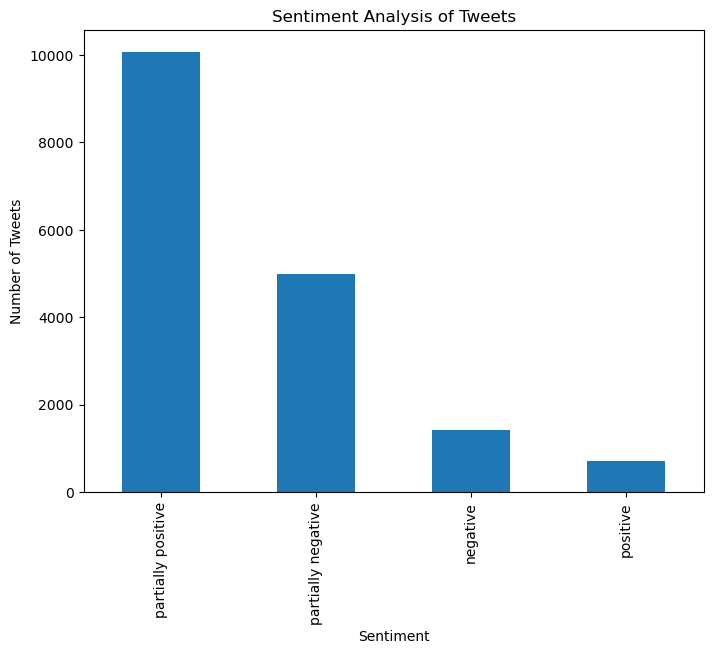

In [73]:
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment_category'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()